In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from pandasql import sqldf
from pandasql import sqldf

In [2]:
#read csv
df = pd.read_csv(r"C:\Users\murtubey\OneDrive\Documentos\Data Science Maestria\Algoritmo y Bases de datos\202303-informe-ministerio.csv",delimiter=";",encoding='latin-1')

C:\Users\murtubey\AppData\Local\Temp\ipykernel_8444\2204789444.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\murtubey\OneDrive\Documentos\Data Science Maestria\Algoritmo y Bases de datos\202303-informe-ministerio.csv",delimiter=";",encoding='latin-1')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612486 entries, 0 to 612485
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Fecha UTC                          612486 non-null  object
 1   Hora UTC                           612486 non-null  object
 2   Clase de Vuelo (todos los vuelos)  612486 non-null  object
 3   Clasificación Vuelo                612486 non-null  object
 4   Tipo de Movimiento                 612486 non-null  object
 5   Aeropuerto                         612486 non-null  object
 6   Origen / Destino                   612486 non-null  object
 7   Aerolinea Nombre                   612486 non-null  object
 8   Aeronave                           612486 non-null  object
 9   Pasajeros                          612486 non-null  object
 10  Calidad dato                       612486 non-null  object
dtypes: object(11)
memory usage: 51.4+ MB


In [4]:
#drop calidad dato 
df.drop(['Calidad dato'], axis=1, inplace=True)


In [5]:
#convert Pasajeros column to string
df['Pasajeros'] = df['Pasajeros'].astype(str)
#replace , with .
df['Pasajeros'] = df['Pasajeros'].str.replace(',','.')
#convert Pasajeros column to float
df['Pasajeros'] = df['Pasajeros'].astype(float)

In [6]:
#controlo con una suma
df['Pasajeros'].sum()

28892567.5

In [7]:
# percentage of null values in each column
df.isnull().sum()/len(df)*100


Fecha UTC                            0.0
Hora UTC                             0.0
Clase de Vuelo (todos los vuelos)    0.0
Clasificación Vuelo                  0.0
Tipo de Movimiento                   0.0
Aeropuerto                           0.0
Origen / Destino                     0.0
Aerolinea Nombre                     0.0
Aeronave                             0.0
Pasajeros                            0.0
dtype: float64

In [8]:
#separo la hora y los minutos en dos columnas
df[['Hora','minutos']] = df['Hora UTC'].str.split(':',expand=True)
df[['Hora']].head()

,Hora
0,23
1,23
2,23
3,23
4,23


In [9]:
df.head()

,Fecha UTC,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,Hora,minutos
0,1/1/2022,23:58,Regular,Doméstico,ATERRIZAJE,IGU,CBA,AEROLINEAS ARGENTINAS SA,BO-737-8HX,71.0,23,58
1,1/1/2022,23:57,No Regular,Doméstico,ATERRIZAJE,AER,EZE,BAIRES FLY SA,LJ-60,0.0,23,57
2,1/1/2022,23:56,Regular,Doméstico,ATERRIZAJE,JUJ,AER,FB LÍNEAS AÉREAS - FLYBONDI,BO-737-8Q8,91.0,23,56
3,1/1/2022,23:55,Regular,Doméstico,ATERRIZAJE,AER,DOZ,AEROLINEAS ARGENTINAS SA,BO-737-800,51.0,23,55
4,1/1/2022,23:50,Regular,Doméstico,ATERRIZAJE,JUJ,AER,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,47.0,23,50


In [10]:
df.columns

Index(['Fecha UTC', 'Hora UTC', 'Clase de Vuelo (todos los vuelos)',
       'Clasificación Vuelo', 'Tipo de Movimiento', 'Aeropuerto',
       'Origen / Destino', 'Aerolinea Nombre', 'Aeronave', 'Pasajeros', 'Hora',
       'minutos'],
      dtype='object')

In [11]:
#renombro las columnas 
df.rename(columns=
        {'Clase de Vuelo (todos los vuelos)': 'clase_vuelo',
        'Tipo de Movimiento': 'movimiento',
        'Aerolinea Nombre':'aerolinea',
        'Fecha UTC':'fecha'
        }, inplace=True)

print(df.columns)

Index(['fecha', 'Hora UTC', 'clase_vuelo', 'Clasificación Vuelo', 'movimiento',
       'Aeropuerto', 'Origen / Destino', 'aerolinea', 'Aeronave', 'Pasajeros',
       'Hora', 'minutos'],
      dtype='object')


In [12]:
#select distinct moviemiento
print(df['movimiento'].unique())
#convert all columns to lower case
df.columns = map(str.lower, df.columns)
df = df.applymap(lambda x: x.lower() if type(x) == str else x)
print(df.columns)



['ATERRIZAJE' 'DESPEGUE' 'Despegue' 'Aterrizaje']
Index(['fecha', 'hora utc', 'clase_vuelo', 'clasificación vuelo', 'movimiento',
       'aeropuerto', 'origen / destino', 'aerolinea', 'aeronave', 'pasajeros',
       'hora', 'minutos'],
      dtype='object')


In [13]:
df['clasificación vuelo'].unique()

array(['doméstico', 'internacional'], dtype=object)

In [14]:
df.columns

Index(['fecha', 'hora utc', 'clase_vuelo', 'clasificación vuelo', 'movimiento',
       'aeropuerto', 'origen / destino', 'aerolinea', 'aeronave', 'pasajeros',
       'hora', 'minutos'],
      dtype='object')

In [16]:
df.rename(columns=
        {'Clase de Vuelo (todos los vuelos)': 'clase_vuelo',
        'Tipo de Movimiento': 'movimiento',
        'Aerolinea Nombre':'aerolinea',
        'Fecha UTC':'fecha'
        }, inplace=True)

In [17]:
df['fecha']=pd.to_datetime(df['fecha'], format='%d/%m/%Y')

In [18]:
df.head()

,fecha,hora utc,clase_vuelo,clasificación vuelo,movimiento,aeropuerto,origen / destino,aerolinea,aeronave,pasajeros,hora,minutos
0,2022-01-01,23:58,regular,doméstico,aterrizaje,igu,cba,aerolineas argentinas sa,bo-737-8hx,71.0,23,58
1,2022-01-01,23:57,no regular,doméstico,aterrizaje,aer,eze,baires fly sa,lj-60,0.0,23,57
2,2022-01-01,23:56,regular,doméstico,aterrizaje,juj,aer,fb líneas aéreas - flybondi,bo-737-8q8,91.0,23,56
3,2022-01-01,23:55,regular,doméstico,aterrizaje,aer,doz,aerolineas argentinas sa,bo-737-800,51.0,23,55
4,2022-01-01,23:50,regular,doméstico,aterrizaje,juj,aer,aerolineas argentinas sa,emb-erj190100igw,47.0,23,50


In [19]:
#obtengo los dias , meses y años de la semana


df['dia'] = pd.DatetimeIndex(df['fecha']).day_name()
df['month'] = pd.DatetimeIndex(df['fecha']).month
df['year'] = pd.DatetimeIndex(df['fecha']).year

#create a new column as period
df['period'] = df['year'].astype(str) + '-' + df['month'].astype(str)



In [20]:
df['period'].unique()

array(['2022-1', '2022-2', '2022-3', '2022-4', '2022-5', '2022-6',
       '2022-7', '2022-8', '2022-9', '2022-10', '2022-11', '2022-12',
       '2023-1', '2023-2', '2023-3'], dtype=object)

In [21]:
df['pasajeros'].sum()

28892567.5

In [22]:
#analizamos los tipos de vuelo y nos quedamos unicamente con los vuelos de tipo regular 
df.groupby(['clase_vuelo']).agg(
    Pasajeros_Count=('pasajeros','count'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.count()*100 / df['pasajeros'].count())
).sort_values(by='Pasajeros_Count', ascending=False).reset_index()

,clase_vuelo,Pasajeros_Count,Pasajeros_Pct_Total
0,regular,339372,55.408940
1,vuelo privado con matrícula nacional,99540,16.251800
2,vuelo escuela,71368,11.652185
3,no regular,53534,8.740445
4,vuelo oficial nacional,37166,6.068057
5,vuelo privado con matrícula extranjera,4826,0.787936
6,vuelo de adiestramiento,4296,0.701404
7,trabajo aéreo,2037,0.332579
8,vuelo oficial extranjero,347,0.056654


In [25]:
#nos quedamos unicamente con los vuelos de tipo regular
df2=df[df['clase_vuelo']=='regular']

In [26]:
df2.head()

,fecha,hora utc,clase_vuelo,clasificación vuelo,movimiento,aeropuerto,origen / destino,aerolinea,aeronave,pasajeros,hora,minutos,dia,month,year,period
0,2022-01-01,23:58,regular,doméstico,aterrizaje,igu,cba,aerolineas argentinas sa,bo-737-8hx,71.0,23,58,Saturday,1,2022,2022-1
2,2022-01-01,23:56,regular,doméstico,aterrizaje,juj,aer,fb líneas aéreas - flybondi,bo-737-8q8,91.0,23,56,Saturday,1,2022,2022-1
3,2022-01-01,23:55,regular,doméstico,aterrizaje,aer,doz,aerolineas argentinas sa,bo-737-800,51.0,23,55,Saturday,1,2022,2022-1
4,2022-01-01,23:50,regular,doméstico,aterrizaje,juj,aer,aerolineas argentinas sa,emb-erj190100igw,47.0,23,50,Saturday,1,2022,2022-1
5,2022-01-01,23:49,regular,doméstico,aterrizaje,bar,aer,jetsmart airlines s.a.,aib-a320-232,87.0,23,49,Saturday,1,2022,2022-1


In [27]:
#dividimos el dataframe en 4 dataframes para su mejor analisis y ver si los podemos joinear 
# la idea es que la salida y el aterrizaje tengan una sola fila 

dfatedomes= df2[(df2['movimiento'] == 'aterrizaje')& (df2['clasificación vuelo'] == 'doméstico')]
dfatedomes.head()
dfdespedomes= df2[(df2['movimiento'] == 'despegue')& (df2['clasificación vuelo'] == 'doméstico')]
dfateinter= df2[(df2['movimiento'] == 'aterrizaje')& (df2['clasificación vuelo'] == 'internacional')]
dfdespeinter= df2[(df2['movimiento'] == 'despegue')& (df2['clasificación vuelo'] == 'internacional')]
dfdespedomes.head()


print(len(dfatedomes),len(dfdespedomes),len(dfateinter),len(dfdespeinter))


#el largo no coincide por lo que hay que ver que pasa con los datos que no se pueden joinear



134478 135474 34288 35132


In [124]:
#distinct count column aerolinea with value counts
print(dfatedomes['aerolinea'].nunique(),
    dfdespedomes['aerolinea'].nunique(),
    dfateinter['aerolinea'].nunique(),
    dfdespeinter['aerolinea'].nunique()
)


52 67 95 111


In [28]:
#analizamos el dataframe de despegues domesticos y tomamos un caso de estudio para analizar
dfdespedomes[(dfdespedomes['aeronave']=='bo-737-8hx')& (dfdespedomes['pasajeros']>0)]


,fecha,hora utc,clase_vuelo,clasificación vuelo,movimiento,aeropuerto,origen / destino,aerolinea,aeronave,pasajeros,hora,minutos,dia,month,year,period
308,2022-01-01,22:49,regular,doméstico,despegue,gal,aer,aerolineas argentinas sa,bo-737-8hx,53.0,22,49,Saturday,1,2022,2022-1
314,2022-01-01,22:25,regular,doméstico,despegue,cba,igu,aerolineas argentinas sa,bo-737-8hx,71.0,22,25,Saturday,1,2022,2022-1
374,2022-01-01,19:30,regular,doméstico,despegue,bar,cba,aerolineas argentinas sa,bo-737-8hx,42.0,19,30,Saturday,1,2022,2022-1
379,2022-01-01,19:06,regular,doméstico,despegue,aer,gal,aerolineas argentinas sa,bo-737-8hx,40.0,19,06,Saturday,1,2022,2022-1
427,2022-01-01,16:29,regular,doméstico,despegue,cba,bar,aerolineas argentinas sa,bo-737-8hx,84.0,16,29,Saturday,1,2022,2022-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612084,2023-03-31,19:55,regular,doméstico,despegue,eca,aer,aerolineas argentinas sa,bo-737-8hx,82.0,19,55,Friday,3,2023,2023-3
612284,2023-03-31,21:46,regular,doméstico,despegue,usu,eze,fb líneas aéreas - flybondi,bo-737-8hx,1.0,21,46,Friday,3,2023,2023-3
612317,2023-03-31,22:02,regular,doméstico,despegue,eze,igu,aerolineas argentinas sa,bo-737-8hx,71.0,22,02,Friday,3,2023,2023-3
612471,2023-03-31,23:47,regular,doméstico,despegue,aer,cba,aerolineas argentinas sa,bo-737-8hx,64.0,23,47,Friday,3,2023,2023-3


In [29]:
#distinct month
dfdespedomes['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [30]:
#concatenate aeronave aeropuerto y pasajeros el obejtivo es crear una clave unica para joinear despegue con aterrizaje

dfdespedomes['clave'] = dfdespedomes['month'].astype(str)+dfdespedomes['year'].astype(str)+dfdespedomes['aeronave'] + dfdespedomes['aeropuerto']+dfdespedomes['origen / destino']+ dfdespedomes['pasajeros'].astype(str)

C:\Users\murtubey\AppData\Local\Temp\ipykernel_8444\3130826772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdespedomes['clave'] = dfdespedomes['month'].astype(str)+dfdespedomes['year'].astype(str)+dfdespedomes['aeronave'] + dfdespedomes['aeropuerto']+dfdespedomes['origen / destino']+ dfdespedomes['pasajeros'].astype(str)


In [138]:
#intentamos crear una clave unica para unir los dataframes y analizar el joineo de los mismos

#distinct count clumn clave
print(dfdespedomes['clave'].nunique())

#len of dataframe
print(len(dfdespedomes))

print('El porcentaje de perdida datos es del',(len(dfdespedomes)-(dfdespedomes['clave'].nunique()))/len(dfdespedomes)*100,'','no se puede crear la clave unica')

103110
135474
El porcentaje de perdida datos es del 23.889454803135656  no se puede crear la clave unica


In [31]:
#Decidimos trabjar unicamente con los aterrizajes

dfatedomes.head()

,fecha,hora utc,clase_vuelo,clasificación vuelo,movimiento,aeropuerto,origen / destino,aerolinea,aeronave,pasajeros,hora,minutos,dia,month,year,period
0,2022-01-01,23:58,regular,doméstico,aterrizaje,igu,cba,aerolineas argentinas sa,bo-737-8hx,71.0,23,58,Saturday,1,2022,2022-1
2,2022-01-01,23:56,regular,doméstico,aterrizaje,juj,aer,fb líneas aéreas - flybondi,bo-737-8q8,91.0,23,56,Saturday,1,2022,2022-1
3,2022-01-01,23:55,regular,doméstico,aterrizaje,aer,doz,aerolineas argentinas sa,bo-737-800,51.0,23,55,Saturday,1,2022,2022-1
4,2022-01-01,23:50,regular,doméstico,aterrizaje,juj,aer,aerolineas argentinas sa,emb-erj190100igw,47.0,23,50,Saturday,1,2022,2022-1
5,2022-01-01,23:49,regular,doméstico,aterrizaje,bar,aer,jetsmart airlines s.a.,aib-a320-232,87.0,23,49,Saturday,1,2022,2022-1


In [32]:
#get week of the month
dfdespedomes['week'] = pd.DatetimeIndex(dfdespedomes['fecha']).week

C:\Users\murtubey\AppData\Local\Temp\ipykernel_8444\689213270.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dfdespedomes['week'] = pd.DatetimeIndex(dfdespedomes['fecha']).week
C:\Users\murtubey\AppData\Local\Temp\ipykernel_8444\689213270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdespedomes['week'] = pd.DatetimeIndex(dfdespedomes['fecha']).week


In [155]:
dfdespedomes.head()

,fecha,hora utc,clase_vuelo,clasificación vuelo,movimiento,aeropuerto,origen / destino,aerolinea,aeronave,pasajeros,hora,minutos,dia de la semana,month,year,dia,clave,week
291,1/1/2022,23:56,regular,doméstico,despegue,cba,aer,jetsmart airlines s.a.,aib-a320-232,62.0,23,56,5,1,2022,Saturday,12022aib-a320-232cbaaer62.0,52
295,1/1/2022,23:37,regular,doméstico,despegue,ros,aer,aerolineas argentinas sa,bo-737-8sh,19.0,23,37,5,1,2022,Saturday,12022bo-737-8shrosaer19.0,52
296,1/1/2022,23:34,regular,doméstico,despegue,igu,eze,aerolineas argentinas sa,bo-b737-8mb,68.0,23,34,5,1,2022,Saturday,12022bo-b737-8mbigueze68.0,52
297,1/1/2022,23:29,regular,doméstico,despegue,sis,cba,aerolineas argentinas sa,emb-erj190100igw,32.0,23,29,5,1,2022,Saturday,12022emb-erj190100igwsiscba32.0,52
300,1/1/2022,23:23,regular,doméstico,despegue,aer,tuc,aerolineas argentinas sa,bo-b737-8sh,75.0,23,23,5,1,2022,Saturday,12022bo-b737-8shaertuc75.0,52


In [42]:
#convert period to date without minutes and seconds

dfdespedomes['period'] = pd.to_datetime(dfdespedomes['period'], format='%Y-%m')

C:\Users\murtubey\AppData\Local\Temp\ipykernel_8444\2816520099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdespedomes['period'] = pd.to_datetime(dfdespedomes['period'], format='%Y-%m')


In [43]:
#cocatenate month and year to get the month and year

#metricas de tiempo - Cuando se viaja mas - cuando se viaja menos - cuando hay mas pasajeros y cuando menos pasajeros

dfgruped=dfdespedomes.groupby(['period']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Q_viajes=('pasajeros', 'count'),
    Detalle_mes=('month', 'unique'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.sum()*100 / df['pasajeros'].sum())
).sort_values(by='period', ascending=False).reset_index()

In [47]:
dfgruped.head()

#remove minuters from period
dfgruped['period'] = pd.to_datetime(dfgruped['period'], format='%Y-%m')

In [166]:
dfdespedomes['pasajeros'].sum()


8826235.0

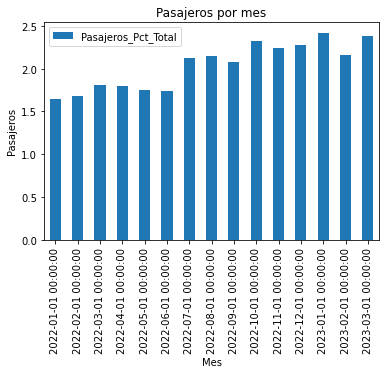

In [48]:
#plot grouped data barchar
dfgruped.sort_values(by='period', ascending=True).plot.bar(x='period', y='Pasajeros_Pct_Total', rot=90)
#color blue
plt.title('Pasajeros por mes')
plt.xlabel('Mes')
plt.ylabel('Pasajeros')
plt.show()

In [52]:

# calculate the sum, count, max, and percentage of total for the 'Pasajeros' and 'days' columns
df.groupby(['hora','aeropuerto']).agg(
    Pasajeros_Sum=('pasajeros', 'sum'),
    Pasajeros_Count=('pasajeros', 'count'),
    Pasajeros_Pct_Total=('pasajeros', lambda x: x.sum()*100 / df['pasajeros'].sum())
).sort_values(by='Pasajeros_Sum', ascending=False).reset_index()



,hora,aeropuerto,Pasajeros_Sum,Pasajeros_Count,Pasajeros_Pct_Total
0,20,aer,616708.5,8699,2.134488
1,10,eze,610291.5,4051,2.112279
2,15,aer,605859.5,8086,2.096939
3,19,aer,595329.0,8272,2.060492
4,13,aer,594949.5,7912,2.059178
...,...,...,...,...,...
1098,01,mlg,0.0,1,0.000000
1099,07,sis,0.0,2,0.000000
1100,09,par,0.0,19,0.000000
1101,08,sra,0.0,6,0.000000


In [54]:
#PIVOT TABLE BY FECHA AND HORA AND PASAJEROS SUM AND PASAJEROS COUNT
df.pivot_table(index=['aeropuerto','fecha'], 
               values=['pasajeros','hora'], 
               aggfunc={'pasajeros': ['sum', 'count'],
                        'hora': 'max'
                        }
                ).reset_index()

aeropuerto      fecha hora pasajeros         
                             max     count      sum
0            aer 2022-01-01   23       186  12351.0
1            aer 2022-01-02   23       243  16758.0
2            aer 2022-01-03   23       268  19145.0
3            aer 2022-01-04   23       229  15633.0
4            aer 2022-01-05   23       261  17028.0
...          ...        ...  ...       ...      ...
19004        vie 2023-03-27   22        12     57.0
19005        vie 2023-03-28   22         9     62.0
19006        vie 2023-03-29   22         9     68.0
19007        vie 2023-03-30   22         6     75.0
19008        vie 2023-03-31   23         9     14.0

[19009 rows x 5 columns]